<a href="https://colab.research.google.com/github/martinpdab/asapa/blob/main/dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from keras.utils.np_utils import to_categorical
%matplotlib inline
sns.set()

In [2]:
#using new dataset
URL = 'https://raw.githubusercontent.com/martinpdab/asapa/main/dataset/New%20Dataset%20Kasus%20Kekerasan.csv'
dataframe = pd.read_csv(URL)
dataframe

,tempat,jenis,banyak_kekerasan,banyak_korban,usia,hubungan_pelaku,label
0,rumah-tangga,fisik,1,1,balita,orang-tua,2
1,rumah-tangga,fisik,1,1,balita,orang-tua,2
2,rumah-tangga,fisik,1,1,balita,orang-tua,2
3,rumah-tangga,fisik,1,1,balita,orang-tua,2
4,rumah-tangga,fisik,1,1,balita,orang-tua,2
...,...,...,...,...,...,...,...
5214,lainnya,traficking,1,2,dewasa,lainnya,2
5215,lainnya,traficking,1,2,dewasa,lainnya,2
5216,lainnya,traficking,2,1,remaja,lainnya,2
5217,lainnya,traficking,2,1,dewasa,lainnya,2


In [3]:
train, test = train_test_split(dataframe, test_size=0.1)
print(len(train), 'train examples')
print(len(test), 'test examples')

4697 train examples
522 test examples


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4697 entries, 2547 to 432
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tempat            4697 non-null   object
 1   jenis             4697 non-null   object
 2   banyak_kekerasan  4697 non-null   int64 
 3   banyak_korban     4697 non-null   int64 
 4   usia              4697 non-null   object
 5   hubungan_pelaku   4697 non-null   object
 6   label             4697 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 293.6+ KB


In [5]:
train.describe()

,banyak_kekerasan,banyak_korban,label
count,4697.000000,4697.000000,4697.000000
mean,1.028103,1.050884,1.148818
std,0.197023,0.231118,0.814186
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000
max,4.000000,3.000000,2.000000


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tempat            5219 non-null   object
 1   jenis             5219 non-null   object
 2   banyak_kekerasan  5219 non-null   int64 
 3   banyak_korban     5219 non-null   int64 
 4   usia              5219 non-null   object
 5   hubungan_pelaku   5219 non-null   object
 6   label             5219 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 285.5+ KB


In [7]:
dataframe.describe()

,banyak_kekerasan,banyak_korban,label
count,5219.000000,5219.000000,5219.000000
mean,1.026825,1.049626,1.146388
std,0.190943,0.230048,0.815498
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000
max,4.000000,3.000000,2.000000


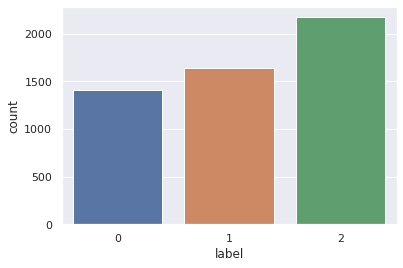

In [8]:
#sns.countplot(x='label', data=train);
sns.countplot(x='label', data=dataframe)

In [9]:
dataframe.groupby(['label','jenis'])['label'].count()

label  jenis       
0      fisik            83
       lainnya         258
       penelantaran      5
       psikis          874
       seksual         189
1      eksploitasi      14
       fisik           335
       lainnya         252
       penelantaran    326
       psikis          428
       seksual         267
       traficking       15
2      eksploitasi      30
       fisik           933
       lainnya          40
       penelantaran    118
       psikis           13
       seksual         961
       traficking       78
Name: label, dtype: int64

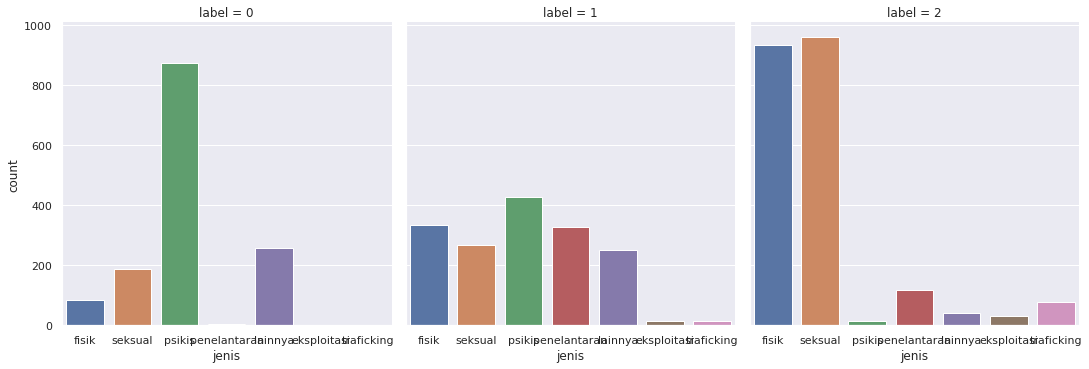

In [10]:
sns.catplot(x='jenis', col='label', kind='count', data=dataframe);

In [11]:
dataframe.groupby(['label','banyak_kekerasan'])['label'].count()

label  banyak_kekerasan
0      1                   1409
1      1                   1614
       2                     23
2      1                   2080
       2                     72
       3                     18
       4                      3
Name: label, dtype: int64

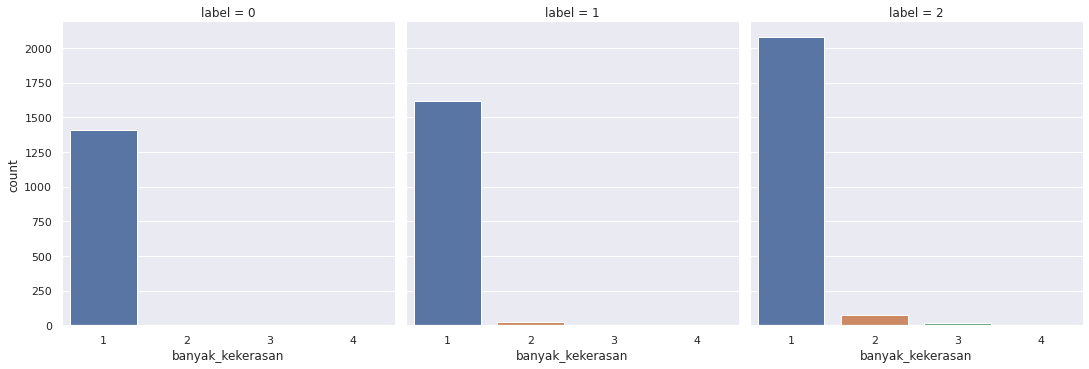

In [12]:
sns.catplot(x='banyak_kekerasan', col='label', kind='count', data=dataframe);

In [13]:
dataframe.groupby(['label','banyak_korban'])['label'].count()

label  banyak_korban
0      1                1369
       2                  40
1      1                1597
       2                  35
       3                   5
2      1                2009
       2                 154
       3                  10
Name: label, dtype: int64

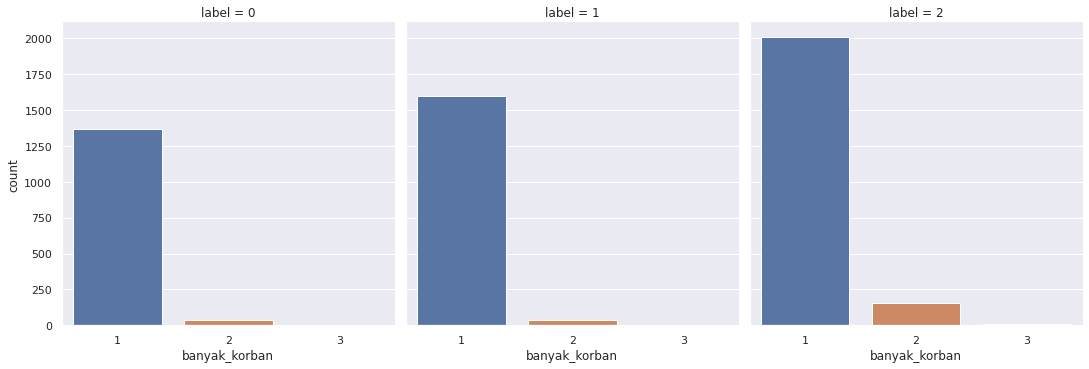

In [14]:
sns.catplot(x='banyak_korban', col='label', kind='count', data=dataframe);

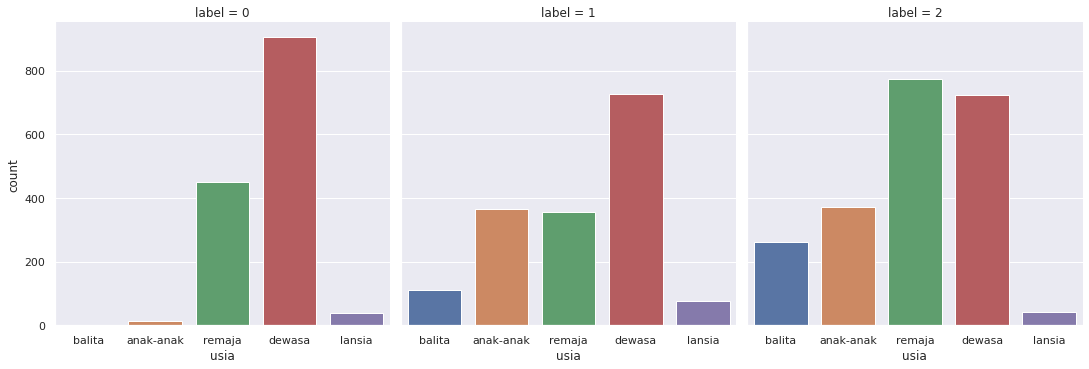

In [15]:
sns.catplot(x='usia', col='label', kind='count', data=dataframe);

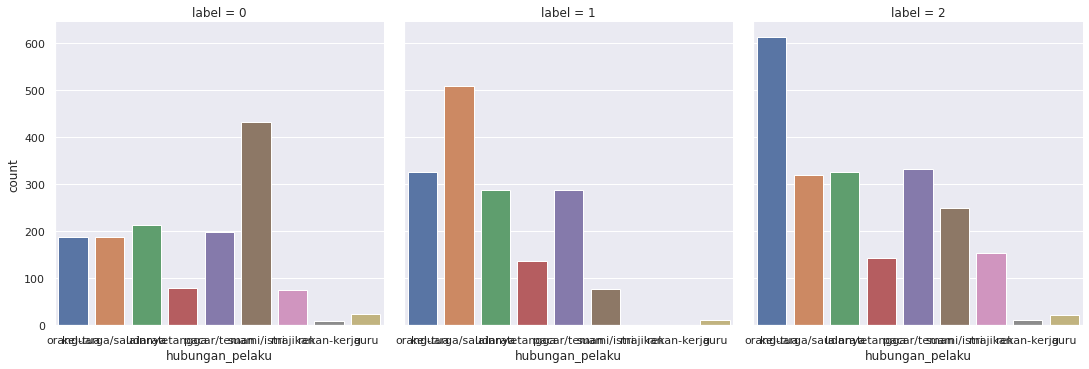

In [16]:
sns.catplot(x='hubungan_pelaku', col='label', kind='count', data=dataframe);

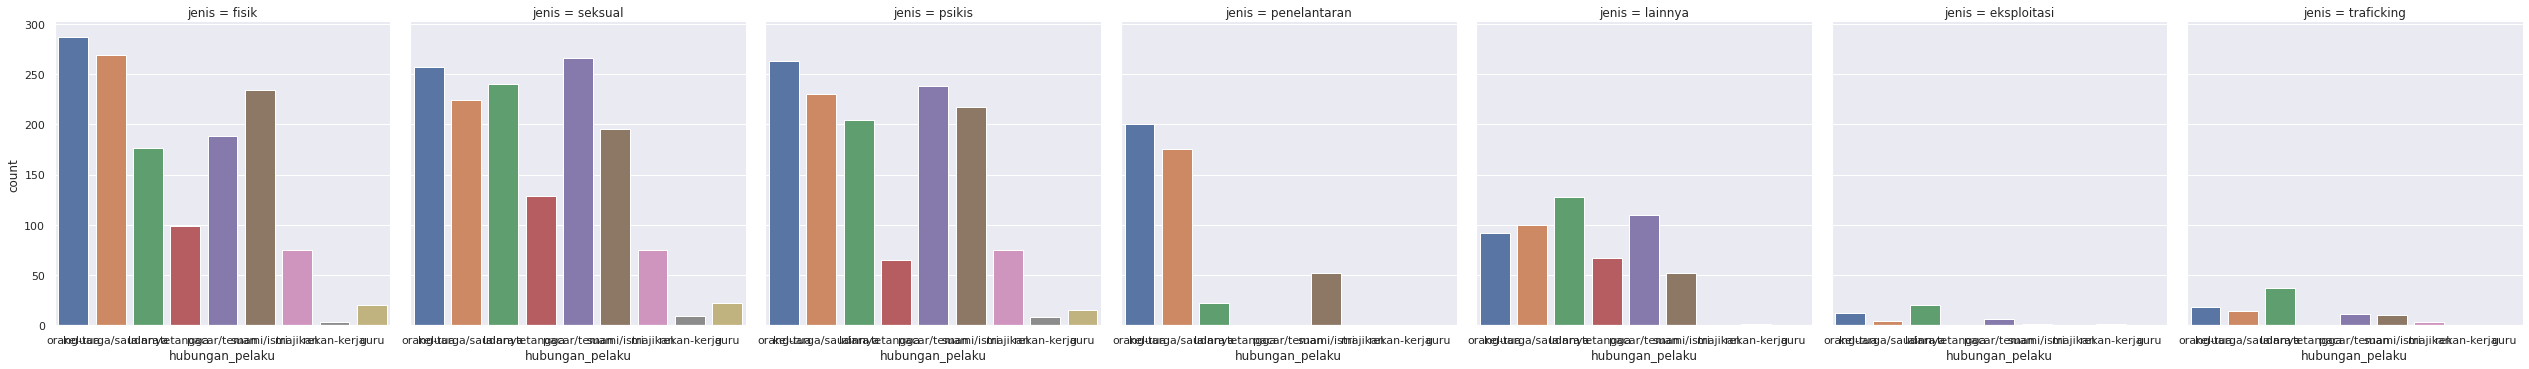

In [17]:
sns.catplot(x='hubungan_pelaku', col='jenis', kind='count', data=dataframe);

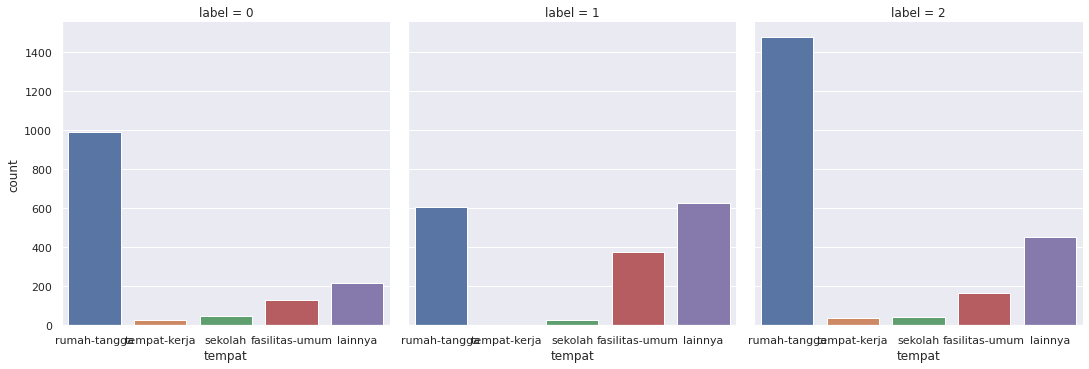

In [18]:
sns.catplot(x='tempat', col='label', kind='count', data=dataframe);

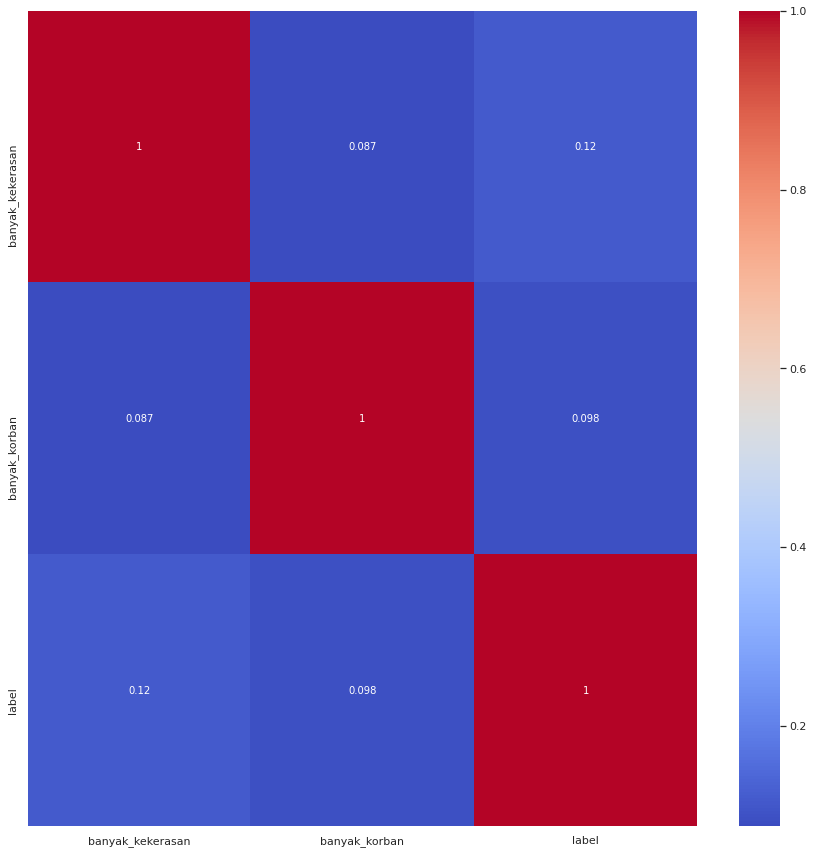

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(dataframe.corr(),annot=True,cmap='coolwarm')
plt.savefig('heatmap.png')